In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':10}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':8 }, 
    'fus': {'marker':'p', 'c':'xkcd:green', 'ms':10}, 
    'hol': {'marker':'H', 'c':'xkcd:blue' , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':12},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':10},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':8},
    
    'mic-2': {'marker':'^', 'c':'xkcd:red','mfc':'w',  'ms':10}, 
    'str-2': {'marker':'P', 'c':'xkcd:clay','mfc':'w', 'ms':10},
    'hom-2': {'marker':'X', 'c':'0.4','mfc':'w', 'ms':8},
}

leg_labs=['Micelle', 'Iso. Stripe', 'Fused Stripe', 'Hole', 'Cylinder', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

def plotF(const, const_val, morphs, ref_morph='cyl',
          morph_xxs={}, morph_filter = {}, s_dict = {'cyl': 1e-04}, k_dict = {'cyl': 2}, show_raw=False):
    from scipy.interpolate import UnivariateSpline
    if const == 'alpha': var = 'sigma'
    elif const=='sigma': var = 'alpha'

    D = All.all[All.all.loc[:,const] == const_val]

    d = D[D.loc[:,'morph']==ref_morph].reset_index()
    y = [i.minF()/i.sigma for i in d.data]
    x = d.loc[:,var]
    
    try: s = s_dict[ref_morph]
    except KeyError: s = 1e-04
    try: k = k_dict[ref_morph]
    except KeyError: k = 3
    try: ref = UnivariateSpline(x, y, s=s, k=k)
    except KeyError: ref = UnivariateSpline(x, y, s=s, k=k)

    maskit = lambda list_a, fil: [i for (i, v) in zip(list_a, fil) if v]
    
    fig = plt.subplots()
    for m in morphs: 
        d = D[D.loc[:,'morph']==m].reset_index()
        # d = d[d.loc[:,'multi']==False].reset_index()
        y = pd.Series([i.minF()/i.sigma for i in d.data])
        x = d.loc[:,var]

        try: mf = morph_filter[m]
        except KeyError: mf = (0,1)
        min_mask = x >= mf[0]
        x = x[min_mask]
        y = y[min_mask]
        max_mask = x <= mf[1]
        x = x[max_mask]
        y = y[max_mask]

        if show_raw: plt.plot(x, y-ref(x), **morph_ms[m], lw=0, zorder=2)

        if m!=ref_morph: 
            try: s = s_dict[m]
            except KeyError: s = 1e-04
            try: k = k_dict[m]
            except KeyError: k = 3
            try:
                xxs = np.arange(morph_xxs[m][0]-1e-04, morph_xxs[m][1]+1e-04, 1e-04)
            except KeyError:
                xxs = np.arange(min(x)-1e-04, max(x)+1e-04, 1e-04)
                
            fit = UnivariateSpline(x, y-ref(x), s=s, k=k)
            plt.plot(xxs, fit(xxs), morph_ms[m]['c'], zorder=3, label=m)
        else:
            plt.plot(x, y-ref(x), morph_ms[m]['c'], lw=2, zorder=2, label=m)

    if const == 'alpha': 
        xl = r'$\sigma$'
    elif const=='sigma': 
        xl = r'$\alpha$'
        
    plt.xlabel(xl)
    plt.ylabel(r'$f_{ex}$ '+'$[{:s}]$'.format(ref_morph))
    plt.legend(loc=(1.05,0.3))
    tjy.ticks()
    
    return fig


tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [1]:
## Local
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work

## Files needed locally
f1_fnames = []

f3_fnames = ['ph_a30s5e3_cyl.dat', 'ph_a30s020_cyl.dat', 'ph_a30s030_cyl-str.dat', 'ph_a30s055_str.dat']
f3_boxes  = [(), (), (12.2, 18.2, 70.2), (10.2, 20.2, 100.2)]

f6_fnames = ['ph_a20s020_mic-mul.dat', 'ph_a30s020_str-mul.dat', 'ph_a30s040_hom-mul.dat']
f6_boxes  = []

# Figure 1

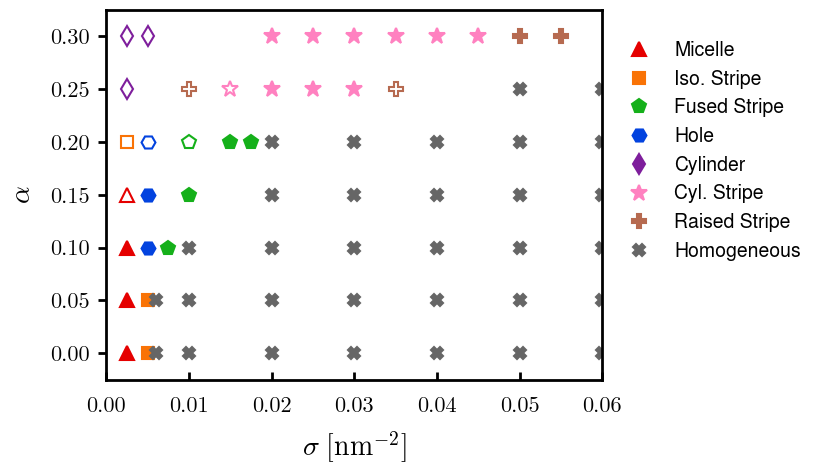

In [2]:
morph_ms_f1 = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':10}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':8 }, 
    'fus': {'marker':'p', 'c':'xkcd:green', 'ms':10}, 
    'hol': {'marker':'H', 'c':'xkcd:blue' , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':12},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':10},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':8}
}
leg_ms = [Line2D([0],[0], **morph_ms_f1[mor], lw=0) for mor in morph_ms_f1.keys()]
leg_labs=['Micelle', 'Iso. Stripe', 'Fused Stripe', 'Hole', 'Cylinder', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

# Not { (0.0, 7e-03), (0.05, 7e-03), (0.2, 0.022), (0.2, 0.025), (0.2, 0.027) [(0.225,i) for i in (2.5e-02, 2.75e-02, 3e-02)] 
#       (0.25, 2.7e-02), (0.25, 3.25e-02), (0.30, 3.25e-02) }

for (a,s) in [(0.00, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 5e-03, 7.5e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.15, i) for i in (2.5e-03, 5e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.20, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.25, i) for i in (2.5e-03, 1.0e-02, 1.5e-02, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 5e-02, 6e-02)] +\
             [(0.30, i) for i in (2.5e-03, 5e-03, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 
                                  4e-02, 4.5e-02, 5e-02, 5.5e-02)]:
    morph, minF, mul, done = get_Morph(a,s)
    x,y,mor = s, a, morph
    
    if done == [True]*len(done): 
        if mul:  plt.plot(x,y, lw=0, **morph_ms_f1[mor], mfc=tjy.lighten_color(morph_ms[mor]['c'], 0.3))
        else:     plt.plot(x,y, lw=0, **morph_ms_f1[mor])
    else:  plt.plot(x,y, lw=0, **morph_ms_f1[mor], mfc='w')

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$')
plt.xlim(0, 0.060)
plt.ylabel(r'$\alpha$')
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02,0.3))
tjy.ticks()

# Figure 2

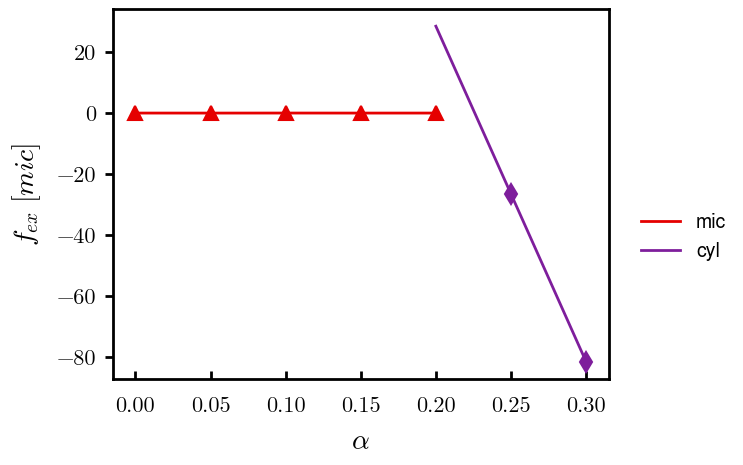

In [2]:
f = plotF('sigma', 2.5e-03, ('mic', 'cyl'), ref_morph='mic', morph_xxs = {'cyl': (0.2, 0.3)}, 
          show_raw=True, k_dict = {'mic': 2, 'cyl': 1}, s_dict = {}
)

# Figure 3

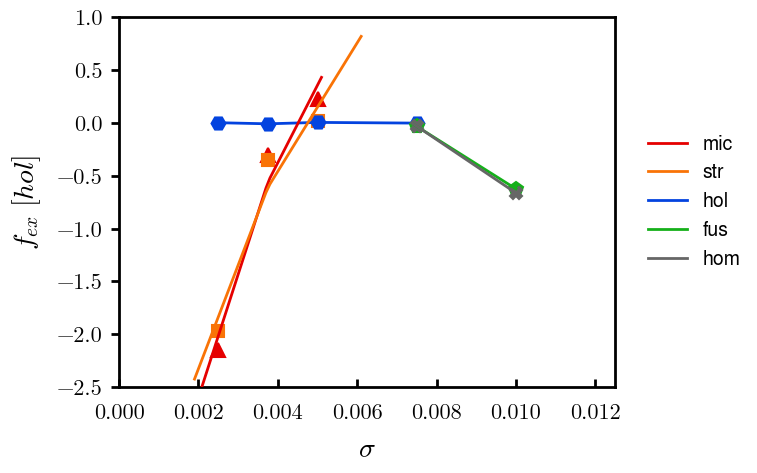

In [11]:
f = plotF('alpha', 0.10, ('mic', 'str', 'hol', 'fus', 'hom'), ref_morph='hol', 
          morph_filter = {'hom': (0.007, 0.011)}, morph_xxs = {'mic': (2e-03, 5e-03), 'str': (2e-03, 6e-03)},
          show_raw=True, s_dict = {'mic':1e-01, 'str':1e-01}, k_dict = {'mic': 1, 'str': 1, 'hol': 2, 'fus': 1, 'hom': 1}
)
plt.xlim(0.0, 0.0125)
plt.ylim(-2.50, 1.0)
tjy.ticks()

# Figure 4

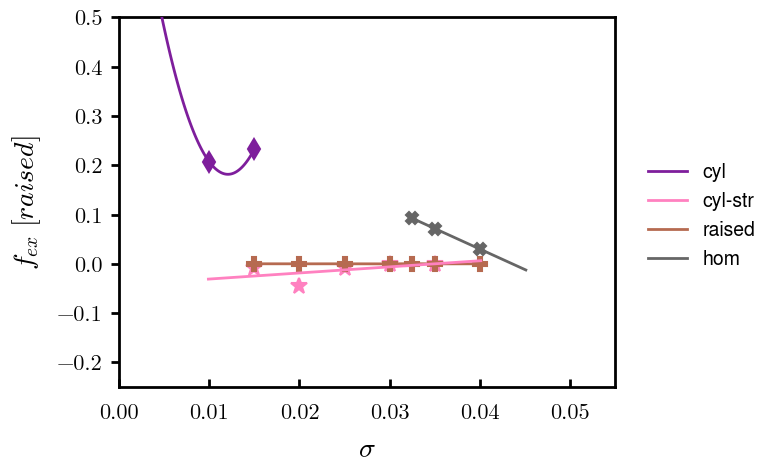

In [10]:
f = plotF('alpha', 0.25, ('cyl', 'cyl-str', 'raised', 'hom'), ref_morph='raised',  show_raw=True, 
          morph_filter = {'cyl': (0, 0.015), 'hom': (0.0325, 0.045), 'raised':(0.015,0.04)}, 
          morph_xxs = {'cyl-str':(0.01, 0.04), 'hom': (0.0325, 0.045)},
          k_dict = {'cyl': 2, 'cyl-str': 1, 'raised': 2, 'hom': 1}, s_dict = {'raised':1e-07, 'cyl-str':1e-01}
)
plt.xlim(0.0, 0.055)
plt.ylim(-0.25, 0.50)
tjy.ticks()

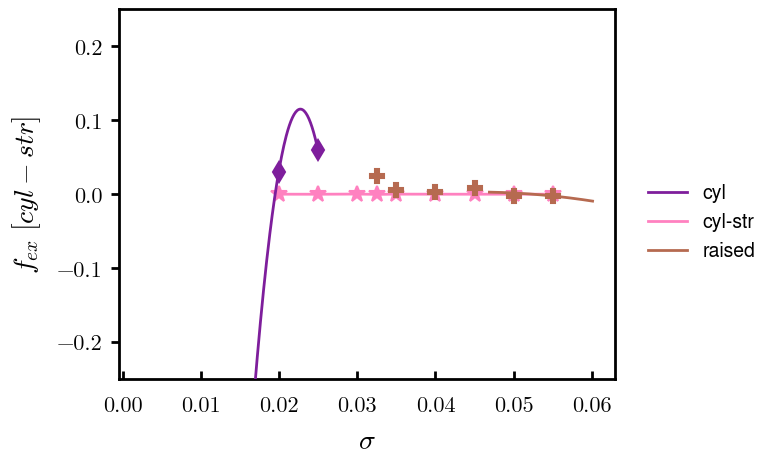

In [6]:
f = plotF('alpha', 0.30, ('cyl', 'cyl-str', 'raised'), ref_morph='cyl-str', 
          morph_filter = {'cyl' : (0, 0.025), 'cyl-str': (0,1), 'raised': (0.0325, 1)}, 
          morph_xxs = {'cyl': (2.5e-03, 0.025), 'cyl-str': (0.015, 0.055), 'raised': (0.047, 0.060)},
          show_raw=True, s_dict={'cyl': 1e-04, 'cyl-str': 1e-07, 'raised': 1e-04}, k_dict = {'cyl': 2, 'cyl-str': 2, 'raised': 2}
)
plt.ylim(-0.25, 0.25)
tjy.ticks()

# Figure 5

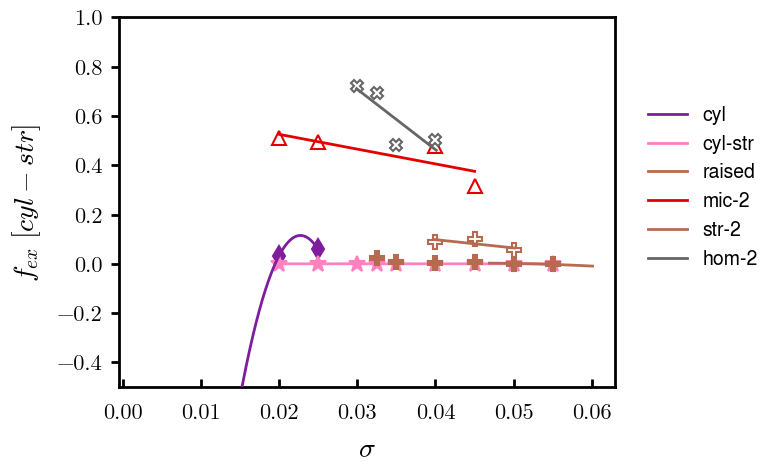

In [14]:
f = plotF('alpha', 0.30, ('cyl', 'cyl-str', 'raised', 'mic-2', 'str-2', 'hom-2'), ref_morph='cyl-str', 
          morph_filter = {'cyl' : (0, 0.025), 'cyl-str': (0,1), 'raised': (0.0325, 1), 'str-2':(0.040,1), 'hom-2':(0.025, 1)}, 
          morph_xxs = {'cyl': (2.5e-03, 0.025), 'cyl-str': (0.015, 0.055), 'raised': (0.047, 0.060)},
          show_raw=True, 
          s_dict={'cyl': 1e-04, 'cyl-str': 1e-07, 'raised': 1e-04, 'mic-2': 1e-01, 'str-2': 1e-01, 'hom-2': 1e-01}, 
          k_dict = {'cyl': 2, 'cyl-str': 2, 'raised': 2, 'mic-2': 1, 'str-2':1, 'hom-2': 1}
)
plt.ylim(-0.50, 1.0)
tjy.ticks()